<a href="https://colab.research.google.com/github/BeniAlexis23/BeniAlexis23/blob/main/Pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1

**Instalar PySpark**

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=39d5f39a4070e670f8a6271dbebb901cd35b7f91d99814cf7bcabd3adefb9161
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


**Importar los módulos**

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max , struct
import matplotlib.pyplot as plts

**Creando la Session spark**

In [3]:
spark = SparkSession.builder.appName("spark_app").getOrCreate()

# Tarea 2

**Importando la información**

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#listening_csv_path = '/content/listenings.csv'

In [4]:
listening_csv_path = '/content/listenings.csv'
listening_df = spark.read.format('csv').option('inferSchema',True).option('header',True).load(listening_csv_path)

In [8]:
listening_df.show(5)

+-----------+-------------+--------------------+---------+-----------------+
|    user_id|         date|               track|   artist|            album|
+-----------+-------------+--------------------+---------+-----------------+
|000Silenced|1299680100000|           Price Tag| Jessie J|      Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...| Jessie J|        Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|    Robyn|         Be Mine!|
|000Silenced|1299679200000|            Acapella|    Kelis|         Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|The Tease|I'm Not Invisible|
+-----------+-------------+--------------------+---------+-----------------+
only showing top 5 rows



**Revisión del dataframe:**

In [9]:
shape = (listening_df.count() , len(listening_df.columns))
print(shape)

(2256363, 5)


**Eliminación de columnas:**

In [10]:
listening_df = listening_df.drop('date')

**Revisión del Dataframe:**

In [11]:
shape = (listening_df.count() , len(listening_df.columns))
print(shape)

(2256363, 4)


In [12]:
listening_df.show(5)

+-----------+--------------------+---------+-----------------+
|    user_id|               track|   artist|            album|
+-----------+--------------------+---------+-----------------+
|000Silenced|           Price Tag| Jessie J|      Who You Are|
|000Silenced|Price Tag (Acoust...| Jessie J|        Price Tag|
|000Silenced|Be Mine! (Ballad ...|    Robyn|         Be Mine!|
|000Silenced|            Acapella|    Kelis|         Acapella|
|000Silenced|   I'm Not Invisible|The Tease|I'm Not Invisible|
+-----------+--------------------+---------+-----------------+
only showing top 5 rows



**Eliminación de filas nulas:**

In [13]:
listening_df = listening_df.na.drop()

**Revisión del conjunto da datos:**

In [15]:
listening_df.show(5)

+-----------+--------------------+---------+-----------------+
|    user_id|               track|   artist|            album|
+-----------+--------------------+---------+-----------------+
|000Silenced|           Price Tag| Jessie J|      Who You Are|
|000Silenced|Price Tag (Acoust...| Jessie J|        Price Tag|
|000Silenced|Be Mine! (Ballad ...|    Robyn|         Be Mine!|
|000Silenced|            Acapella|    Kelis|         Acapella|
|000Silenced|   I'm Not Invisible|The Tease|I'm Not Invisible|
+-----------+--------------------+---------+-----------------+
only showing top 5 rows



In [16]:
shape = (listening_df.count() , len(listening_df.columns))
print(shape)

(2105634, 4)


**Revisión del esquema:**

In [17]:
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



**Dataframe:**

In [18]:
shape = (listening_df.count() , len(listening_df.columns))
print(shape)

(2105634, 4)


# Tarea *3*

**Query#1: Seleccione 2 columnas: pista (track) y artista (artist)**

In [19]:
q1 = listening_df.select('artist','track')
q1.show(5)

+---------+--------------------+
|   artist|               track|
+---------+--------------------+
| Jessie J|           Price Tag|
| Jessie J|Price Tag (Acoust...|
|    Robyn|Be Mine! (Ballad ...|
|    Kelis|            Acapella|
|The Tease|   I'm Not Invisible|
+---------+--------------------+
only showing top 5 rows



**Query#2: Búsqueda de todos los registros de aquellos usuarios que han escuchado a Rihanna**

In [21]:
q2 = listening_df.select('*').filter(listening_df.artist == 'Rihanna')
q2.show(5)

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
+-----------+--------------------+-------+--------------------+
only showing top 5 rows



**Query#3: Encontremos el top 10 de usuarios que son fanáticos de Rihanna**

In [22]:
q3 = listening_df.select('user_id').filter(listening_df.artist =='Rihanna').groupby('user_id').agg(count('user_id').alias('count')).orderBy(desc('count')).limit(10)
q3.show()

+--------------+-----+
|       user_id|count|
+--------------+-----+
|          adxx|  164|
|       AndyyyA|  123|
|    BIGBANG186|  121|
|      AndyKitt|  115|
|   Aims_rose18|  103|
|ascendingstars|   82|
|    acidbubble|   74|
|    AntonyLowe|   63|
|       cathers|   60|
|BRITNEYFAN9921|   58|
+--------------+-----+



**Query#4: Encuentra las 10 pistas más famosas**

In [23]:
q4 = listening_df.select('artist','track').groupby('artist','track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q4.show()

+--------------+----------------+-----+
|        artist|           track|count|
+--------------+----------------+-----+
| Justin Bieber|           Sorry|  567|
|          Zayn|      PILLOWTALK|  561|
|      Bon Iver|     Skinny Love|  511|
|Arctic Monkeys|Do I Wanna Know?|  476|
|      Bastille|         Pompeii|  440|
|Mumford & Sons| Little Lion Man|  438|
|Ellie Goulding|     Starry Eyed|  431|
|     Lady Gaga|     Bad Romance|  430|
|       Rihanna|            Work|  429|
| Justin Bieber|   Love Yourself|  426|
+--------------+----------------+-----+



**Query#5: Encuentra los 10 temas más famosos de Rihanna**

In [26]:
q5 = listening_df.select('artist','track').filter(listening_df.artist == 'Rihanna').groupby('artist','track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q5.show()

+-------+--------------------+-----+
| artist|               track|count|
+-------+--------------------+-----+
|Rihanna|                Work|  429|
|Rihanna|We Found Love (fe...|  271|
|Rihanna|Only Girl (In the...|  266|
|Rihanna|            Rude Boy|  217|
|Rihanna|            Diamonds|  205|
|Rihanna|                 S&M|  193|
|Rihanna|      Kiss it Better|  140|
|Rihanna| Where Have You Been|  133|
|Rihanna|           Needed Me|  131|
|Rihanna|           Desperado|  131|
+-------+--------------------+-----+



**Query#6 Encuentra los 10 álbunes mas famosos**

In [27]:
q6 = listening_df.select('artist','album').groupby('artist','album').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q6.show()

+--------------+--------------------+-----+
|        artist|               album|count|
+--------------+--------------------+-----+
|         alt-J|     An Awesome Wave| 2228|
|        The xx|                  xx| 2208|
|Mumford & Sons|        Sigh No More| 2165|
|Arctic Monkeys|                  AM| 2071|
|      Bon Iver|            For Emma| 2067|
|Arctic Monkeys|Whatever People S...| 1974|
|    Kanye West|   The Life of Pablo| 1961|
|        Grimes|          Art Angels| 1918|
|         Adele|                  21| 1806|
|   Biffy Clyro|    Only Revolutions| 1761|
+--------------+--------------------+-----+



# Tarea 4: revisa tu aula virtual y desarrolla el ejercicio de Pyspark

In [28]:
genre_csv_path = 'genre.csv'
genre_df=spark.read.format('csv').option('inferSchema',True).option('header',True).load(genre_csv_path)

**Se mostrará la información de las columnas artista y genre**

In [29]:
genre_df.show(5)

+----------+-----+
|    artist|genre|
+----------+-----+
|      Muse| rock|
|   Nirvana| rock|
|  Bon Jovi| rock|
|The Police| rock|
|      Kiss| rock|
+----------+-----+
only showing top 5 rows



In [30]:
listening_df.show(5)

+-----------+--------------------+---------+-----------------+
|    user_id|               track|   artist|            album|
+-----------+--------------------+---------+-----------------+
|000Silenced|           Price Tag| Jessie J|      Who You Are|
|000Silenced|Price Tag (Acoust...| Jessie J|        Price Tag|
|000Silenced|Be Mine! (Ballad ...|    Robyn|         Be Mine!|
|000Silenced|            Acapella|    Kelis|         Acapella|
|000Silenced|   I'm Not Invisible|The Tease|I'm Not Invisible|
+-----------+--------------------+---------+-----------------+
only showing top 5 rows



**Unir ambos modelos de datos**

In [32]:
data = listening_df.join(genre_df, how ='inner',on=['artist'])
data.show(5)

+--------+-----------+--------------------+-----------+--------------------+
|  artist|    user_id|               track|      album|               genre|
+--------+-----------+--------------------+-----------+--------------------+
|Jessie J|000Silenced|           Price Tag|Who You Are| Ariana Grande & ...|
|Jessie J|000Silenced|           Price Tag|Who You Are| Jhene Aiko & Rixton|
|Jessie J|000Silenced|           Price Tag|Who You Are| Nicki Minaj & Ar...|
|Jessie J|000Silenced|           Price Tag|Who You Are|                 pop|
|Jessie J|000Silenced|Price Tag (Acoust...|  Price Tag| Ariana Grande & ...|
+--------+-----------+--------------------+-----------+--------------------+
only showing top 5 rows



**Query #7: Encuentra los 10 mejores usuarios que son fanáticos de la música pop**

In [33]:
q7 = data.select('user_id').filter(data.genre == 'pop').groupby('user_id').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q7.show()

+--------------+-----+
|       user_id|count|
+--------------+-----+
|       01Green|  496|
|    BIGBANG186|  227|
|   aboylike_me|  200|
|    addywalter|  199|
| artistic-leaf|  199|
|   CarlDawkins|  198|
|       beth182|  197|
|BeatriceCarver|  196|
|    angelsmith|  193|
|      Chloe_25|  193|
+--------------+-----+



**Query #8: Encuentra los 10 géneros más famosos**

In [34]:
q8 = data.select('genre').groupby('genre').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q8.show()

+----------+------+
|     genre| count|
+----------+------+
|      rock|404071|
|       pop|238921|
|electronic| 84225|
|   hip hop| 79702|
|indie rock| 69374|
|      folk| 69028|
|      punk| 58787|
|       r&b| 56613|
|      jazz| 33122|
|     indie| 32798|
+----------+------+



**Query #9: Descubra el género favorito de cada usuario**

In [68]:
q9 = data.select('user_id','genre').groupby('user_id','genre').agg(count('*').alias('count')).orderBy('user_id').limit(10)
q9.show()

+----------+--------------------+-----+
|   user_id|               genre|count|
+----------+--------------------+-----+
|-Amnesiac-|               metal|  150|
|-Amnesiac-|                rock|   50|
|    -Bald-|                jazz|    1|
|    -Bald-|            trip hop|   10|
|    -Bald-|                rock|   26|
|    -Bald-|contemporary clas...|   27|
|    -Bald-|   Mikołaj Stroiński|    6|
|    -Bald-|          french pop|    3|
|    -Bald-|         power metal|   11|
|    -Bald-|           indie pop|   44|
+----------+--------------------+-----+



In [70]:
q9_2 = q9.groupby('user_id').agg(max(struct(col('count'),col('genre'))).alias('max')).select(col('user_id'),col('max.genre'))
q9_2.show()

+----------+----------+
|   user_id|     genre|
+----------+----------+
|-Amnesiac-|     metal|
|    -Bald-|soundtrack|
+----------+----------+



**Query #10: Descubre cuantos cantantes de pop, rock, metal y hip hop
tenemos y luego visualizarlo usando un gráfico de barras**

In [43]:
q10 = genre_df.select('genre').filter((col('genre') == 'pop') | (col('genre') == 'rock') | (col('genre') == 'metal')|(col('genre') == 'hip hop')).groupby('genre').agg(count('*').alias('count'))
q10.show()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



**Ahora, visualizamos los resultados usando matplotlib**

In [46]:
q10_list = q10.collect()
lables = [row['genre'] for row in q10_list]
counts = [row['count'] for row in q10_list]
print(lables)
print(counts)

['pop', 'hip hop', 'metal', 'rock']
[6960, 4288, 1854, 9066]


**Ahora visualizamos estas dos listas usando un gráfico de barras**

<BarContainer object of 4 artists>

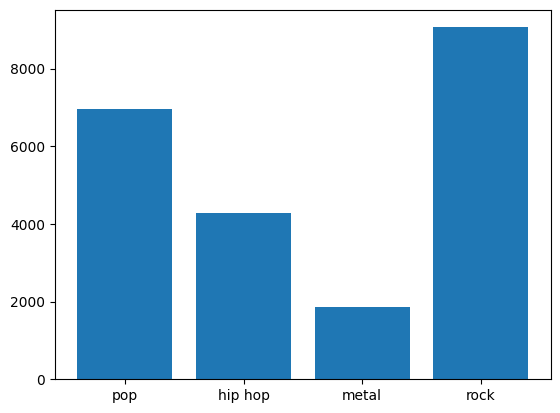

In [47]:
plts.bar(lables,counts)